### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import train_test_split

In [2]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
titanic = pd.read_csv('titanic.csv')
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S


<AxesSubplot:>

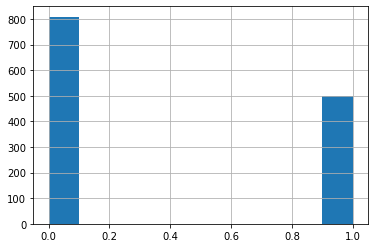

In [3]:
titanic.survived.hist()

#### Preprocess the data as it has been done in the lab, feel free to adapt

In [4]:
def preprocess(dataset):

    data = dataset.drop(columns=['name'])

    #print('% of positive samples in whole data:', sum(data['survived'] == 1) / len(data))
    x_train, x_test, y_train, y_test = train_test_split(data.loc[:, 'pclass':], data['survived'],
                                                    test_size=0.2, stratify=data['survived'])

    #print('% of positive samples in train set:', sum(y_train== 1) / len(x_train))
    #print('% of positive samples in test set:', sum(y_test== 1) / len(x_test))
    # imputing missing values
    imputer = SimpleImputer(strategy='most_frequent')
    imputer.fit(x_train)
    x_train = pd.DataFrame(imputer.transform(x_train), columns=x_train.columns)
    x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

    # one-hot-encode categorical features
    def ohe_new_features(df, features_name, encoder):
        new_feats = encoder.transform(df[features_name])
        # create dataframe from encoded features with named columns
        new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names_out(features_name))
        new_df = pd.concat([df, new_cols], axis=1)    
        new_df.drop(features_name, axis=1, inplace=True)
        return new_df

    encoder = OneHotEncoder(sparse=False, drop='first')
    f_names = ['sex', 'embarked']
    encoder.fit(x_train[f_names])
    x_train = ohe_new_features(x_train, f_names, encoder)
    x_test = ohe_new_features(x_test, f_names, encoder)

    # feature scaling
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

    return [x_train, y_train, x_test, y_test]

In [5]:
preprocess(titanic)[0].head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0.0,0.159031,0.250,0.222222,0.512122,1.0,0.0,0.0
1,1.0,0.008410,0.625,0.222222,0.091543,1.0,0.0,1.0
2,1.0,0.297101,0.000,0.000000,0.015412,1.0,0.0,1.0
3,0.0,0.786620,0.125,0.000000,0.152164,0.0,0.0,1.0
4,0.0,0.046065,0.000,0.222222,0.159777,1.0,0.0,1.0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [6]:
def get_ratio(num_total, num_survived, des_ratio):
    return int((num_total * des_ratio - num_survived) / (des_ratio - 1))

0.20059288537549408
0.30017301038062283
0.3937007874015748


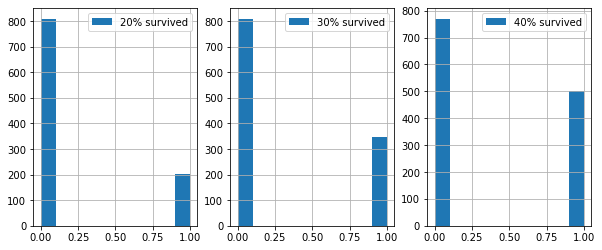

In [11]:

survived_ind = list(titanic[titanic.survived == 1].index)
not_survived_ind = list(titanic[titanic.survived == 0].index)

random.shuffle(survived_ind)
random.shuffle(not_survived_ind)

dataset1 = titanic.drop(index=survived_ind[0:get_ratio(len(titanic), len(survived_ind), 0.2)])
dataset2 = titanic.drop(index=survived_ind[0:get_ratio(len(titanic), len(survived_ind), 0.3)])
dataset3 = titanic.drop(index=not_survived_ind[0:-get_ratio(len(titanic), len(survived_ind), 0.4)])

print(dataset1[dataset1.survived == 1].size / dataset1.size)
print(dataset2[dataset2.survived == 1].size / dataset2.size)
print(dataset3[dataset3.survived == 1].size / dataset3.size)

fig, ax = plt.subplots(1, 3)

fig.set_figwidth(10)

dataset1.survived.hist(ax = ax[0], label='20% survived')
dataset2.survived.hist(ax = ax[1], label='30% survived')
dataset3.survived.hist(ax = ax[2], label='40% survived')

ax[0].legend()
ax[1].legend()
ax[2].legend()

plt.show()

In [12]:
### write your code here 

datasets = [dataset1, dataset2, dataset3]
models = []
results = []

In [13]:
for dataset in datasets:
    x_train, y_train, x_test, y_test = preprocess(dataset)
    
    model = LogisticRegression()
    model.fit(x_train, y_train)
    models.append(model)

    y_pred = model.predict(x_test)
    results.append({'accuracy': metrics.accuracy_score(y_test, y_pred),
                    'precision': metrics.precision_score(y_test, y_pred),
                    'recall': metrics.recall_score(y_test, y_pred)})

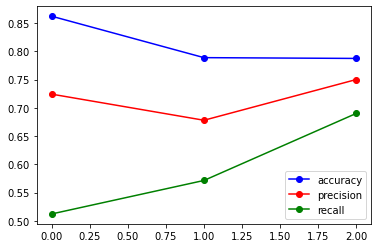

In [14]:
fig = plt.subplot()

plt.plot(range(len(models)), [res['accuracy'] for res in results], color='blue', marker='o', label='accuracy')
plt.plot(range(len(models)), [res['precision'] for res in results], color='red', marker='o', label='precision')
plt.plot(range(len(models)), [res['recall'] for res in results], color='green', marker='o', label='recall')

plt.legend()
plt.show()

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

[[159   3]
 [ 24  17]]
[[143  19]
 [ 24  46]]
[[130  24]
 [ 32  68]]


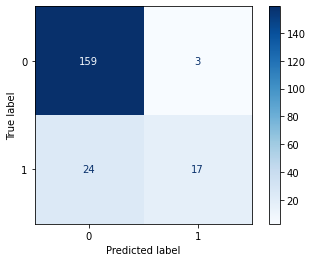

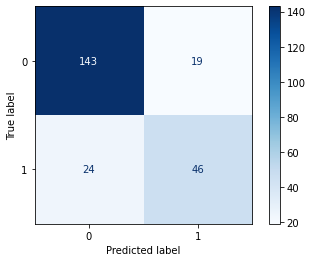

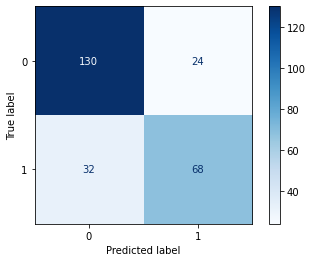

In [15]:
#### write your code
for dataset in datasets:
    x_train, y_train, x_test, y_test = preprocess(dataset)

    model = LogisticRegression().fit(x_train, y_train)

    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_test,
        cmap=plt.cm.Blues,
    )

    print(disp.confusion_matrix)

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`Even though accuracy of the model has degraded in general, it is easy to see the result of balancing the dataset. Increasing the percentage of the smallest class, we have significantly improved precision of our prediction and as a result, successfully managed to improve the prediction of survival. While the number of wrong predictions did not change much, number of successfull predictions of the class 1 has significantly improved.`